In [1]:
import os
os.chdir('../')
# This should be the project root folder
os.getcwd()

'/home/pex/Documents/unitn/TODO/Applied_ML/lab/project'

In [2]:
import tensorflow as tf

from adda.models import Phase1Model
from adda.data_loaders import USPS

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from adda.settings import config as cfg

2021-12-09 22:21:03.042242: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-09 22:21:03.042274: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# Load the dataset into the data object
data = USPS(sample=True, normalize=True, resize28=True)

In [5]:
len(data.training_data)

1800

[4]
[1]
[16]
[14]
[11]
[10]
[7]
[0]
[17]
[26]


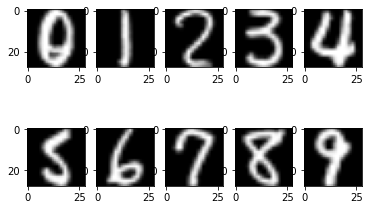

In [6]:
# Plot an ordered sample of handwritten digits (and their index)
X = data.training_data
Y = data.training_labels

fig, ax = plt.subplots(2, 5)
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(Y == i)[0]
    print(im_idx)
    plottable_image = np.reshape(X[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray')

In [7]:
# Load the trained and saved model
model = tf.keras.models.load_model(cfg.PHASE1_MODEL_PATH, compile=False)
model.summary()

2021-12-09 22:22:32.178208: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-09 22:22:32.178252: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-09 22:22:32.178282: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PexNotebook): /proc/driver/nvidia/version does not exist


Model: "phase1_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
le_net_encoder (LeNetEncoder multiple                  25570     
_________________________________________________________________
le_net_classifier (LeNetClas multiple                  405510    
Total params: 431,080
Trainable params: 431,080
Non-trainable params: 0
_________________________________________________________________


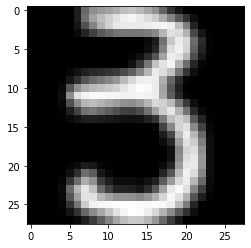

In [8]:
# Select an image to be classified by the model
img = X[14]
plottable_image = np.reshape(img, (28, 28))
plt.gray()
plt.imshow(plottable_image)
plt.show()

In [9]:
# Verify the label associated to the training datapoint
label = Y[14]
Y[14]

3

In [10]:
# Expand dimensions to [1, 28, 28, 1]
img = np.reshape(img, (1, 28, 28, 1))
np.shape(img)

(1, 28, 28, 1)

In [11]:
# Replicate the image expanding the dimensions to [2, 28, 28, 1]
# Why? Because TensorFlow doesn't like a single input; so a replication is needed.
img = np.tile(img, [2, 1, 1, 1])
np.shape(img)

(2, 28, 28, 1)

In [12]:
# Let's make a class prediction for the selected image
logits, preds = model(img, training=False)

# Extract the maximun value of the class probabilities
prediction = tf.argmax(preds, -1)
print('Class: {}'.format(prediction[0]))
print('Predictions: {}'.format(preds[0]))

# We generated a feature map of a USPS data point using the CNN encoder trained with the MNIST dataset.
# Obviously it is wrongly classified.

Class: 7
Predictions: [0.06661466 0.12021705 0.15080969 0.10356371 0.06200151 0.14578764
 0.07642174 0.16719584 0.03881112 0.06857703]


2021-12-09 22:22:39.944412: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-09 22:22:39.967152: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2691275000 Hz
